## **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## **2. Collecting the data**

- This dataset specifies about the total number of vehicles registered in India from **January 2014 to July 2023**.
- The data has been categorized into fuel variant of the vehicle registered.

In [2]:
df = pd.read_csv("Fuel type Registration of Vehicles.csv")
df.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


## **3. Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [4]:
df.shape

(115, 19)

In [5]:
df.isnull().sum()

Month                 0
CNG ONLY              0
DIESEL                0
DIESEL/HYBRID         0
DUAL DIESEL/CNG       0
ELECTRIC(BOV)         0
ETHANOL               0
LPG ONLY              0
NOT APPLICABLE        0
PETROL                0
PETROL/CNG            0
PETROL/ETHANOL        0
PETROL/HYBRID         0
PETROL/LPG            0
SOLAR                 0
FUEL CELL HYDROGEN    0
LNG                   0
METHANOL              0
DUAL DIESEL/LNG       0
dtype: int64

In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df['Month'].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Month, dtype: datetime64[ns]

In [7]:
df['Hybrid Combined'] = df['DIESEL/HYBRID'] + df['PETROL/HYBRID']

df.drop(['PETROL/HYBRID', 'DIESEL/HYBRID'], axis = 1, inplace=True)

#### **1. Line plot**

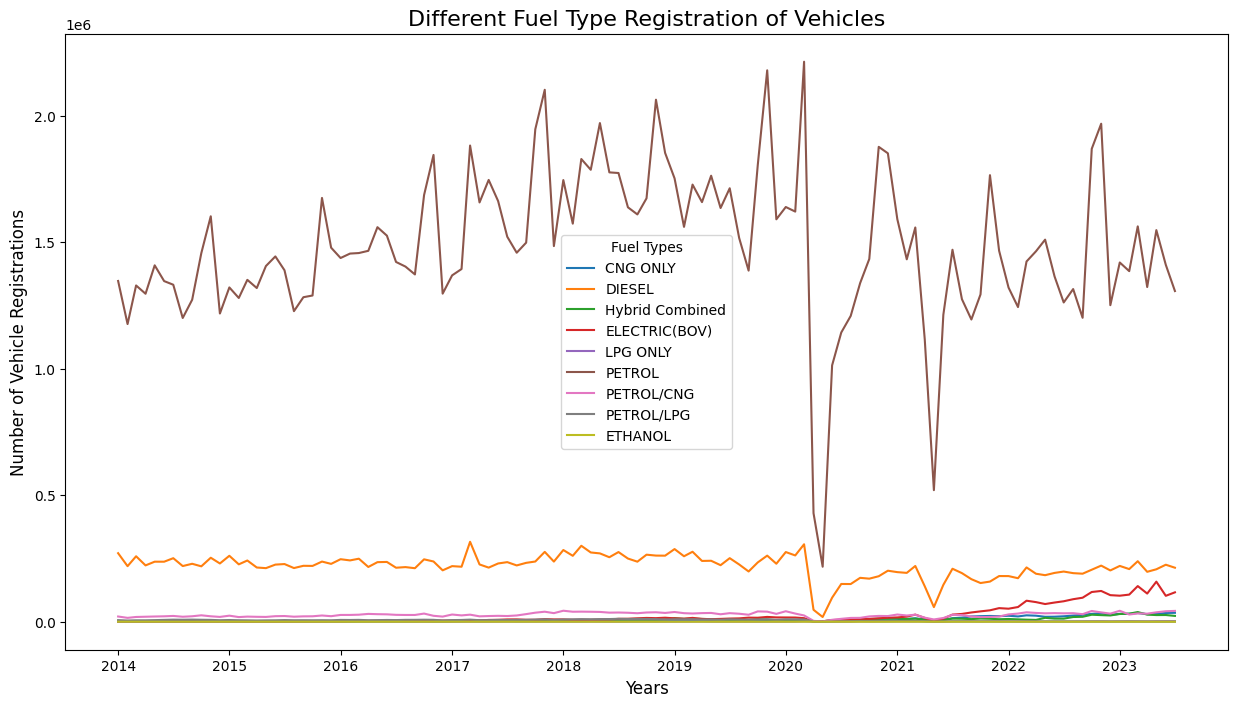

In [8]:
plot = df[['CNG ONLY', 'DIESEL', 'Hybrid Combined', 'ELECTRIC(BOV)', 'LPG ONLY', 'PETROL', 'PETROL/CNG', 'PETROL/LPG', 'ETHANOL']]

plt.figure(figsize=(15, 8))

for i in plot.columns:
    plt.plot(df['Month'], plot[i], label = i)

plt.xlabel('Years', fontsize = 12)
plt.ylabel('Number of Vehicle Registrations', fontsize = 12)
plt.title('Different Fuel Type Registration of Vehicles', fontsize = 16)
plt.legend(title = 'Fuel Types')
plt.show()

**From the above graph:**
- Petrol vehicles have the highest number of registrations throughout the time period.
- Diesel vehicles registrations remain stable over time.
- Electric vehicles show an increasing trend in registrations over time  

#### **2. Bar plot**

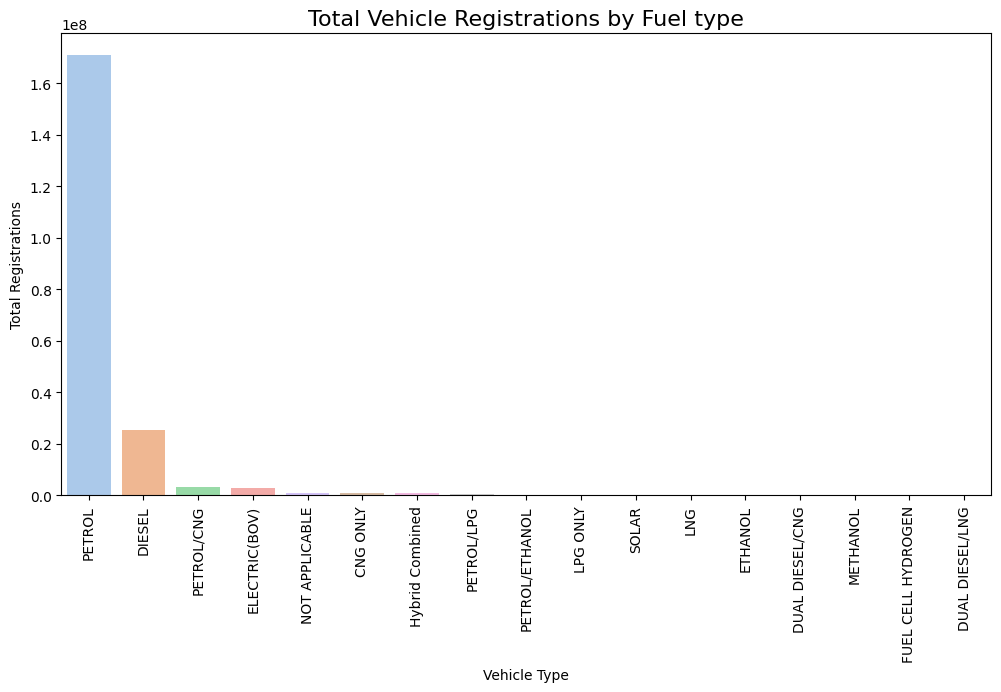

In [9]:
totalRegistrations = df.iloc[:, 1:].sum()

# Sorting the values of total registrations
sortedTotalRegistrations = totalRegistrations.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x = sortedTotalRegistrations.index, y = sortedTotalRegistrations.values, palette='pastel')
plt.xticks(rotation = 90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Registrations')
plt.title('Total Vehicle Registrations by Fuel type', fontsize = 16)
plt.show()    

#### **3. Histogram**

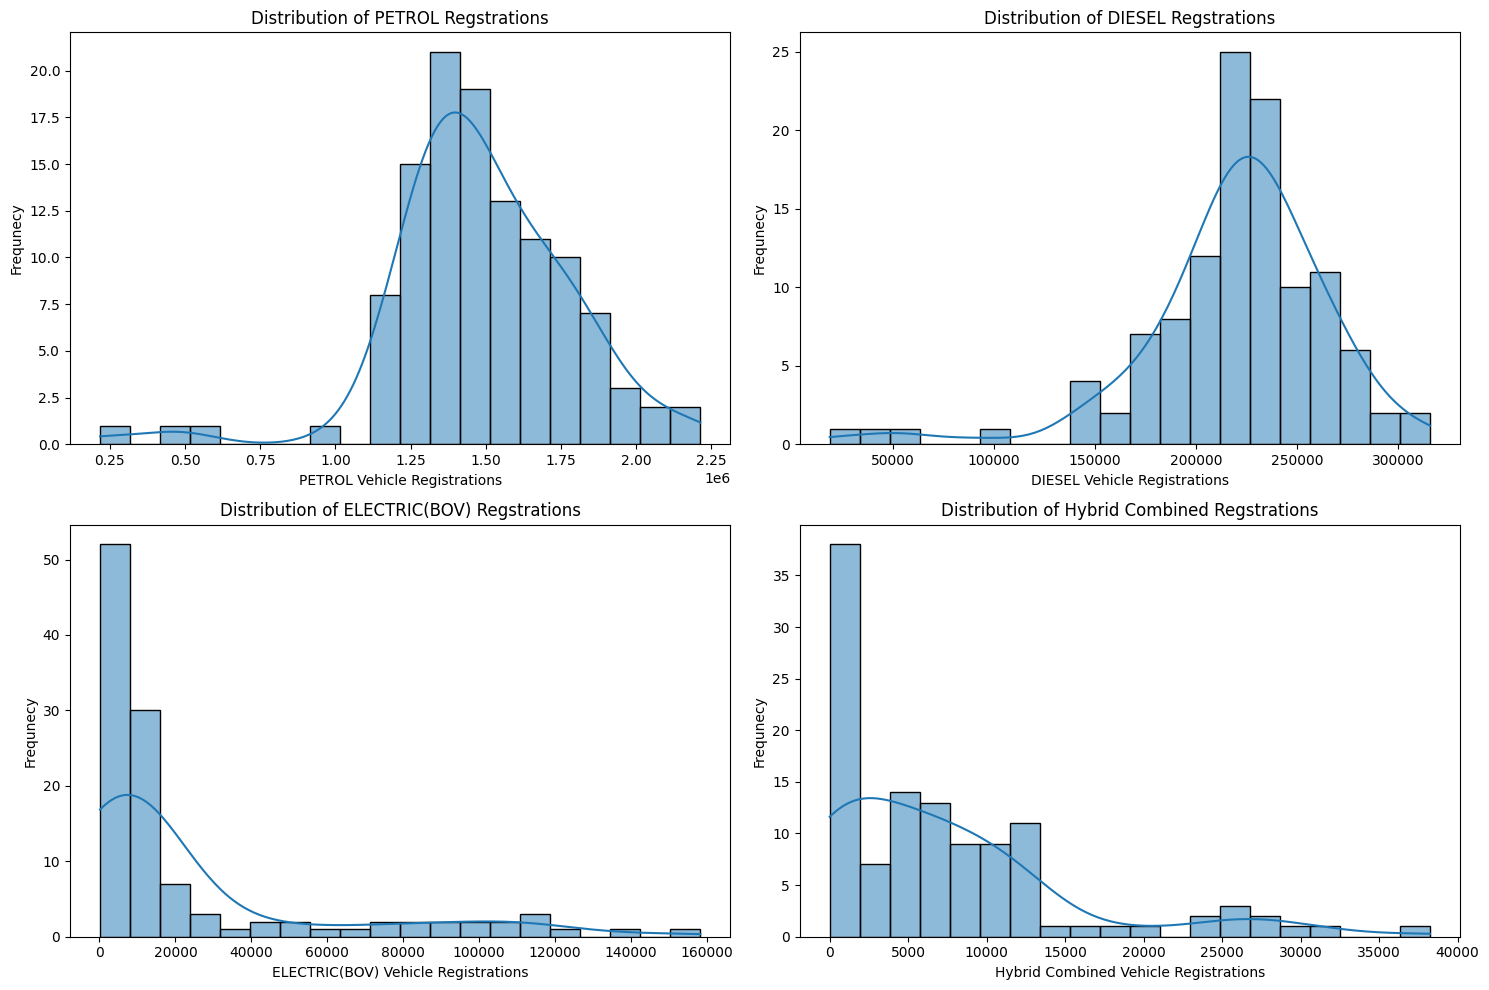

In [10]:
# Histogram

hist = df[['PETROL', 'DIESEL', 'ELECTRIC(BOV)', 'Hybrid Combined']]

plt.figure(figsize=(15, 10))

for i, col in enumerate(hist.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=hist[col], bins=20, kde=True)
    plt.xlabel(col + ' Vehicle Registrations')
    plt.ylabel('Frequnecy')
    plt.title('Distribution of ' + col + ' Regstrations')

plt.tight_layout()
plt.show()

#### **4. Line plot for top registered vehicles**

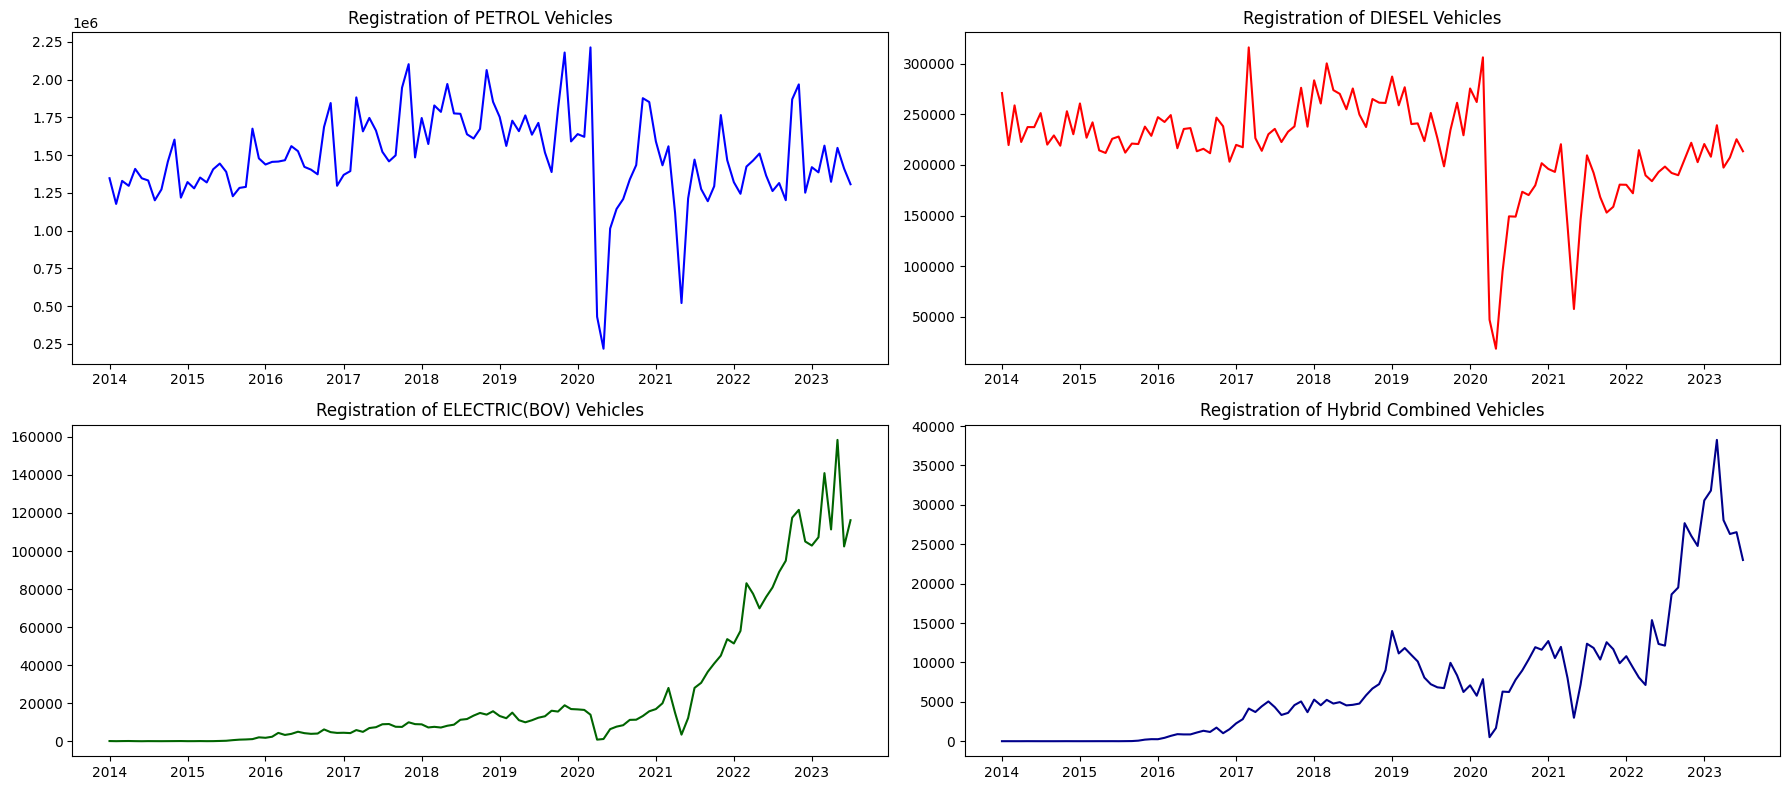

In [11]:
plt.figure(figsize=(18, 8))
colors = ['blue', 'red', 'darkgreen', 'darkblue']

for i, col in enumerate(hist.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df['Month'], hist[col], color = colors[i - 1])
    plt.title('Registration of ' + col + ' Vehicles')

plt.tight_layout()
plt.show()

- Out of all the four variant fuel type, the registrations of **Electric Vehicles** and **Hybrid Vehicles** show an increasing trend over the time period.
- Since these 4 columns represents highly registered vehicles, we try build a model for these 4 categories.

In [12]:
finalColumns = ['Month', 'DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'Hybrid Combined']
finaldf = df.loc[:,finalColumns]
finaldf.head()

,Month,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined
0,2014-01-01,270915,1347016,232,3
1,2014-02-01,219601,1176669,171,4
2,2014-03-01,258723,1329273,220,3
3,2014-04-01,222632,1296500,252,3
4,2014-05-01,237336,1408836,186,7


#### **5. Pair plot for finalised columns**

<Figure size 1000x800 with 0 Axes>

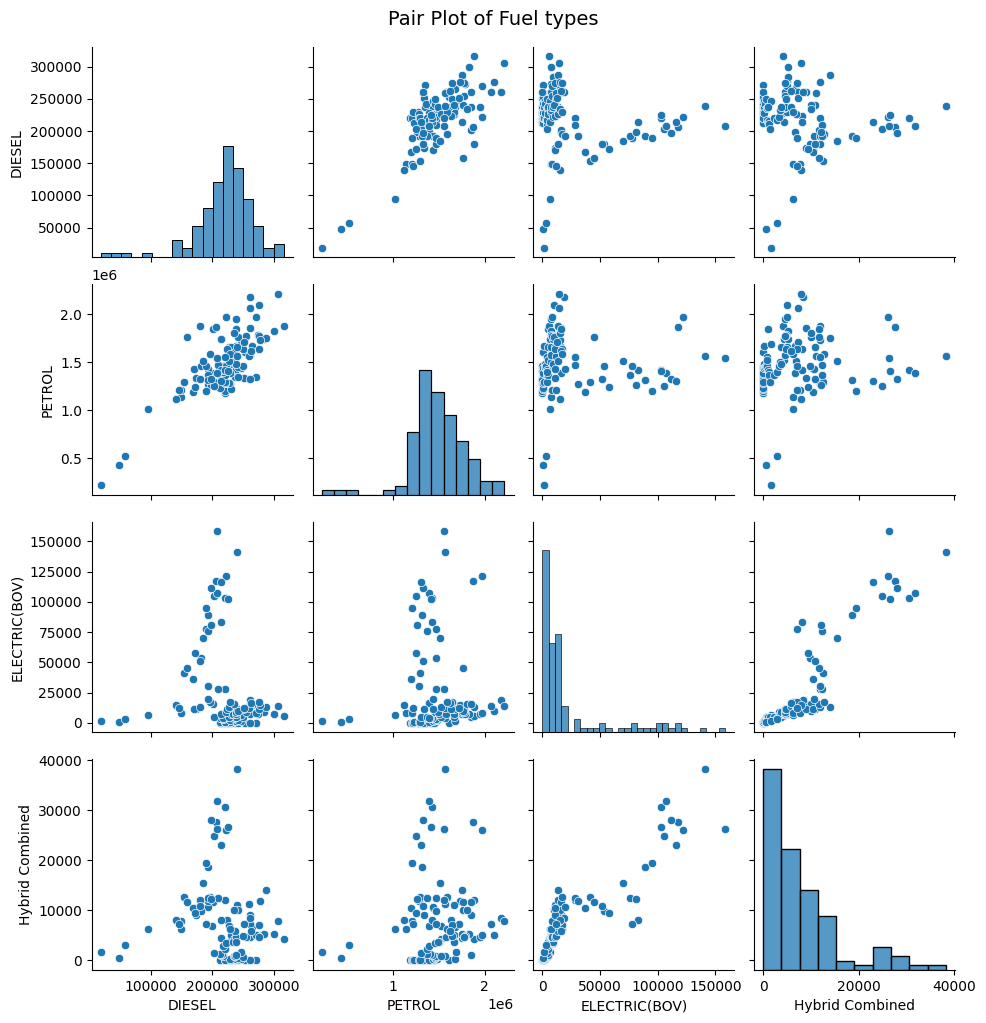

In [13]:
plt.figure(figsize=(10, 8))
sns.pairplot(finaldf)
plt.suptitle('Pair Plot of Fuel types', fontsize = 14, y = 1.02)
plt.show()


#### **6. Correlation matrix**

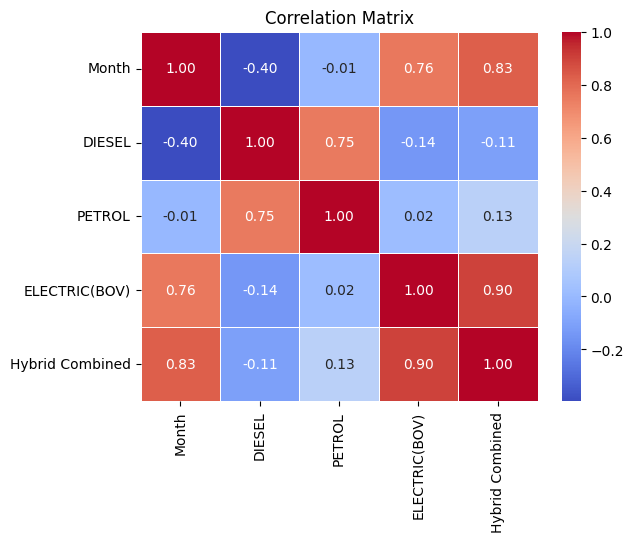

In [14]:
correlation = finaldf.corr()
sns.heatmap(correlation, cmap='coolwarm', fmt='.2f', annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- **Strong Positive Correlation** exists between 'ELECTRIC(BOV)' and 'Hybrid Combined' (0.9).
- **Strong Negative Correlation** exists between 'DIESEL' and 'Hybrid Combined' (-0.14).
- **Moderate Positive Correlation** exists between 'DIESEL' and 'PETROL' (0.75).

In [15]:
finaldf['Year'] = finaldf['Month'].dt.year

selectedYears = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
filtereddf = finaldf[finaldf['Year'].isin(selectedYears)]
totalRegistrationsPerYear = filtereddf.groupby('Year')[['DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'Hybrid Combined']].sum()
totalRegistrationsPerYear

,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined
Year,,,,
2017,2866351,19726177,87420,46961
2018,3193144,21295432,130253,67544
2019,2928435,20292514,166823,111469
2020,2027781,15988251,124647,86185
2021,2015058,15897908,331463,122124
2022,2343962,17196377,1024796,191876
2023,1511312,9958148,839212,204491


In [16]:
fuelTypePercentages = totalRegistrationsPerYear.divide(totalRegistrationsPerYear.sum(axis=1), axis=0) * 100
fuelTypePercentages

,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined
Year,,,,
2017,12.612146,86.796568,0.384654,0.206632
2018,12.934845,86.263916,0.527631,0.273608
2019,12.461828,86.353912,0.709908,0.474351
2020,11.125233,87.718057,0.683864,0.472846
2021,10.971346,86.559018,1.804710,0.664926
2022,11.292387,82.846114,4.937108,0.924391
2023,12.077778,79.581382,6.706634,1.634207


<Figure size 1000x600 with 0 Axes>

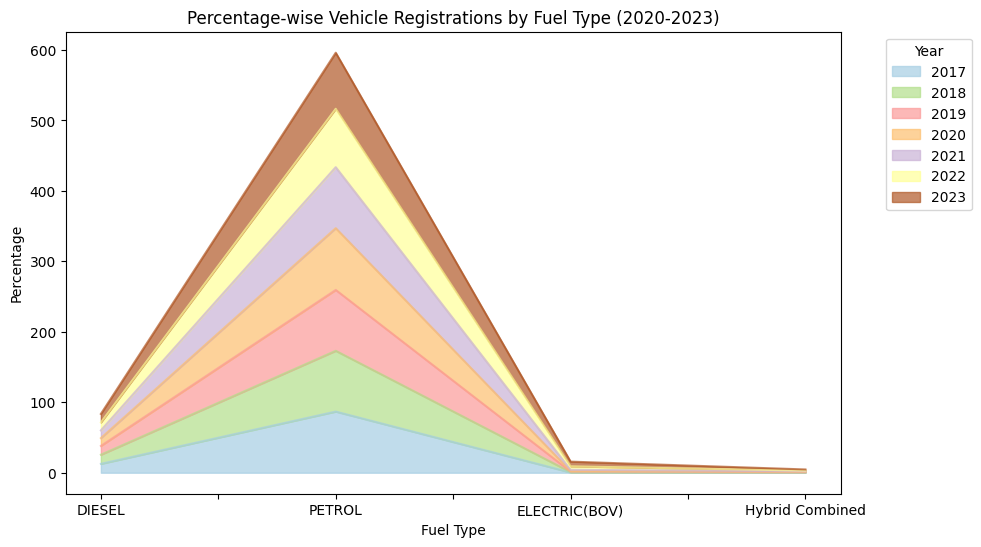

In [17]:
plt.figure(figsize=(10, 6))
fuelTypePercentages.T.plot(kind='area', colormap='Paired', alpha=0.7, figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2020-2023)')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Petrol vehicles remains the dominant fuel type in the market during the specified period (2017 to 2023).
- The percentage of Electric vehicle registrations is increasing over the years, as of 2023 recorded as 6.706%.

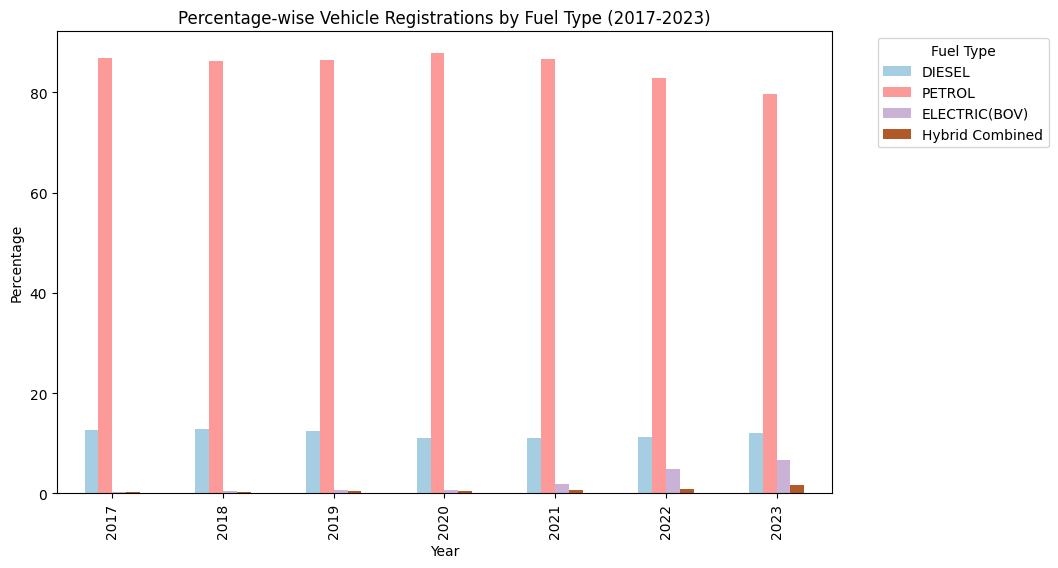

In [18]:
fuelTypePercentages.plot(kind='bar', colormap='Paired', figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
dataColumn = finaldf['Month']
numericalData = finaldf.iloc[:, 1:]
numericalData

,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined,Year
0,270915,1347016,232,3,2014
1,219601,1176669,171,4,2014
2,258723,1329273,220,3,2014
3,222632,1296500,252,3,2014
4,237336,1408836,186,7,2014
...,...,...,...,...,...
110,239185,1562953,140895,38240,2023
111,197337,1323102,111327,28058,2023
112,207305,1548095,158336,26299,2023
113,225327,1410875,102409,26529,2023


## **4. Performing PCA**

In [20]:
scale = StandardScaler()
numericalScaledData = scale.fit_transform(numericalData)
numericalScaledData = pd.DataFrame(numericalScaledData, columns=numericalData.columns)
numericalScaledData

,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined,Year
0,1.111431,-0.460729,-0.664603,-0.915162,-1.552189
1,0.006371,-1.030807,-0.666306,-0.915037,-1.552189
2,0.848873,-0.520107,-0.664938,-0.915162,-1.552189
3,0.071644,-0.629784,-0.664045,-0.915162,-1.552189
4,0.388299,-0.253843,-0.665887,-0.914663,-1.552189
...,...,...,...,...,...
110,0.428117,0.261920,3.261945,3.859649,1.693298
111,-0.473090,-0.540758,2.436567,2.588181,1.693298
112,-0.258427,0.212197,3.748804,2.368527,1.693298
113,0.129682,-0.247020,2.187625,2.397248,1.693298


In [21]:
pca = PCA(random_state = 42)
pca.fit(numericalScaledData)

PCA(random_state=42)

In [22]:
dataPCA = pca.transform(numericalScaledData)

In [23]:
dfPCA = pd.DataFrame(dataPCA, columns = [f'PC{x +1}' for x in range(len(numericalScaledData.columns))])

In [24]:
dfPCA

,PC1,PC2,PC3,PC4,PC5
0,-1.987999,-0.123561,-1.052020,-0.245548,-0.040174
1,-1.700748,1.010833,-0.892833,0.123998,-0.162165
2,-1.924178,0.092010,-0.974634,-0.121975,-0.065859
3,-1.738075,0.683008,-0.712109,0.275596,-0.138102
4,-1.833817,0.207383,-0.645957,0.268703,-0.095725
...,...,...,...,...,...
110,4.828619,-1.712374,-1.346994,0.134883,-0.758909
111,3.907270,-0.174353,-0.794938,-0.019760,-0.299265
112,4.418564,-0.986493,-1.129548,0.709139,0.605711
113,3.505081,-0.707454,-0.736641,-0.321802,-0.212875


In [25]:
PCAsummary = pd.DataFrame({'Standard Deviation':dfPCA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
PCAsummary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.661434,0.547272,0.547272
PC2,1.325844,0.348516,0.895787
PC3,0.573775,0.065271,0.961058
PC4,0.341158,0.023075,0.984134
PC5,0.282892,0.015866,1.000000


In [26]:
factorLoadings = pd.DataFrame(pca.components_, columns = numericalScaledData.columns, index = dfPCA.columns).T

In [27]:
factorLoadings

,PC1,PC2,PC3,PC4,PC5
DIESEL,-0.230549,-0.660465,-0.411808,-0.577395,0.087537
PETROL,-0.058510,-0.709256,0.520517,0.469873,0.042582
ELECTRIC(BOV),0.555404,-0.138057,-0.509733,0.378399,0.519089
Hybrid Combined,0.564441,-0.204135,-0.140009,-0.011392,-0.787403
Year,0.562456,-0.003321,0.529194,-0.550017,0.317912


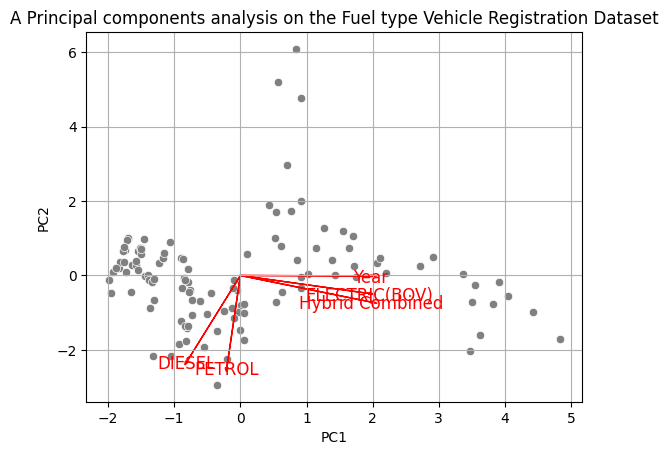

In [28]:
indexNames = factorLoadings.index

sns.scatterplot(dfPCA, x = 'PC1', y = 'PC2', color = 'grey')

for i in range(len(factorLoadings['PC1'])):
    plt.arrow(0, 0, factorLoadings['PC1'][i] * 3.5, factorLoadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factorLoadings['PC1'][i] * 3.5), factorLoadings['PC2'][i]* 3.5, indexNames[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis on the Fuel type Vehicle Registration Dataset')
plt.grid(True)
plt.show()

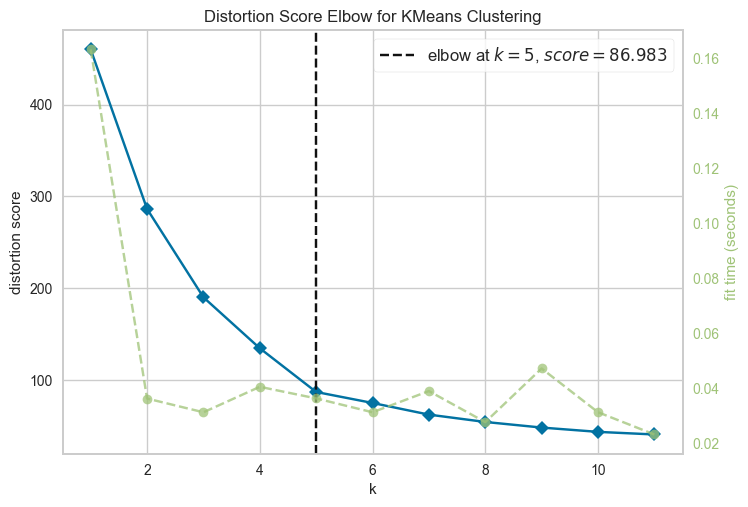

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(numericalScaledData.iloc[:, :-1])

# Display the elbow p
visualizer.show()

- Through the Elbow Curve method, the optimal number of clusters can be made for the given data is likely **k=5**.
- This means that the KMeans Algorithm can effectively group the data points into five distinct clusters with minimal distortion.

### **KMeans Clustering**

In [30]:
kmeans = KMeans(n_clusters=5)  
finaldf['Cluster'] = kmeans.fit_predict(numericalScaledData)

# Visualize or analyze the clusters
print(finaldf['Cluster'].value_counts())

Cluster
1    41
3    34
4    24
0    12
2     4
Name: count, dtype: int64


In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(numericalScaledData)
finaldf['Cluster Number'] = kmeans.labels_ 
# Label assigned for each data point
print('Labels assigned for each data point:', kmeans.labels_, sep='\n') 

# Gives within-cluster sum of squares. 
print('Sum of squares within cluster:', kmeans.inertia_) 

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations:', kmeans.n_iter_) 

# Location of the centroids on each cluster.
print('Location of the cetriods on each cluster:', kmeans.cluster_centers_, sep='\n') 

Labels assigned for each data point:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 3 3 3 3 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3
 3 2 2 2 4 4 4 4 4 3 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0
 0 0 0 0]
Sum of squares within cluster: 100.62123634520664
No. of iterations: 7
Location of the cetriods on each cluster:
[[-0.19442227 -0.07033171  2.50937309  2.426448    1.54304354]
 [ 0.24694002 -0.29431282 -0.60354216 -0.81966996 -1.09483083]
 [-3.54589718 -3.14464113 -0.58471837 -0.55777243  0.70162098]
 [ 0.79212452  0.97353729 -0.34879707 -0.06121791  0.00691707]
 [-0.85583826 -0.31712072  0.36794689  0.36673297  0.97207823]]


In [32]:
finaldf.head()

,Month,DIESEL,PETROL,ELECTRIC(BOV),Hybrid Combined,Year,Cluster,Cluster Number
0,2014-01-01,270915,1347016,232,3,2014,1,1
1,2014-02-01,219601,1176669,171,4,2014,1,1
2,2014-03-01,258723,1329273,220,3,2014,1,1
3,2014-04-01,222632,1296500,252,3,2014,1,1
4,2014-05-01,237336,1408836,186,7,2014,1,1


In [33]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 41, 3: 34, 4: 24, 0: 12, 2: 4})

In [34]:
kmeans.cluster_centers_[:,1]

array([-0.07033171, -0.29431282, -3.14464113,  0.97353729, -0.31712072])

## **5. Profiling Segments**

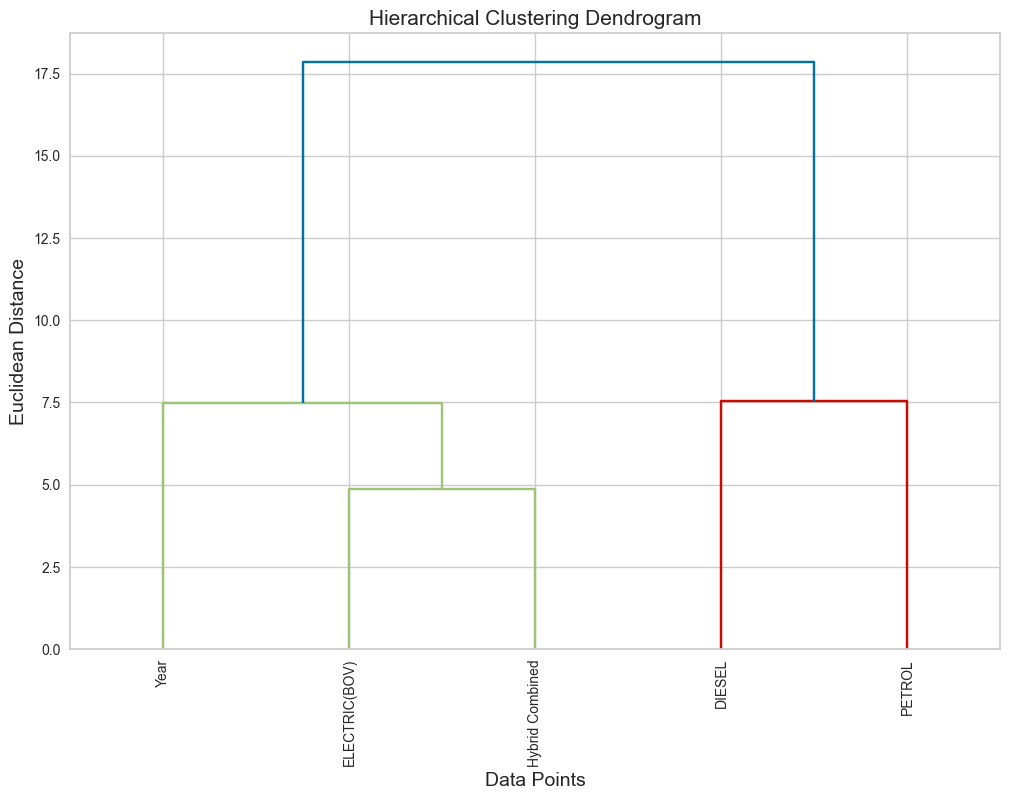

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = numericalScaledData.transpose()

# Perform hierarchical clustering
MD_vclust = linkage(transposed_data, method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 15)
plt.xlabel("Data Points", fontsize = 14)
plt.ylabel("Euclidean Distance", fontsize = 14)
plt.show()

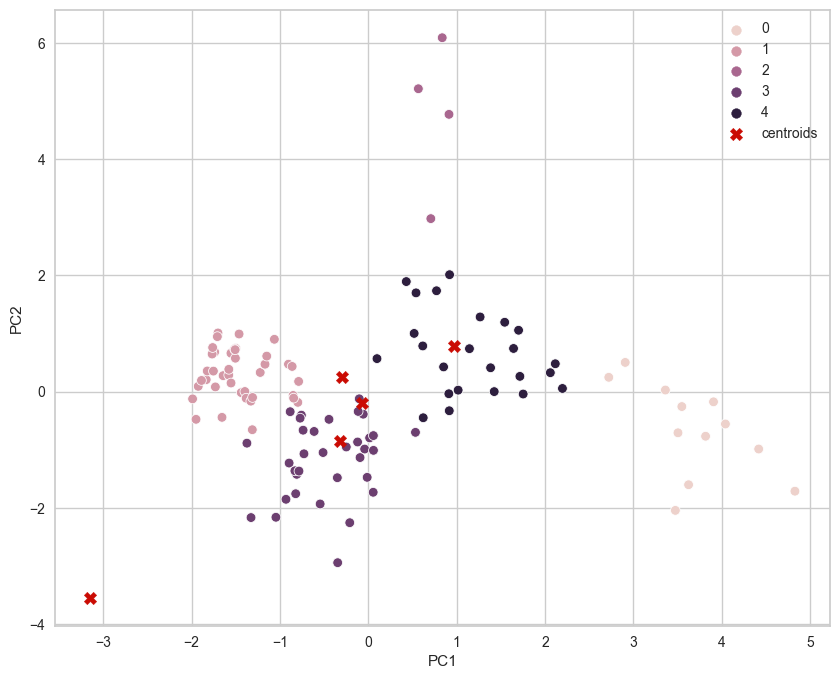

In [36]:
# Scatter plot of data points and clusters formed
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfPCA, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

## **6. Describing Segments**

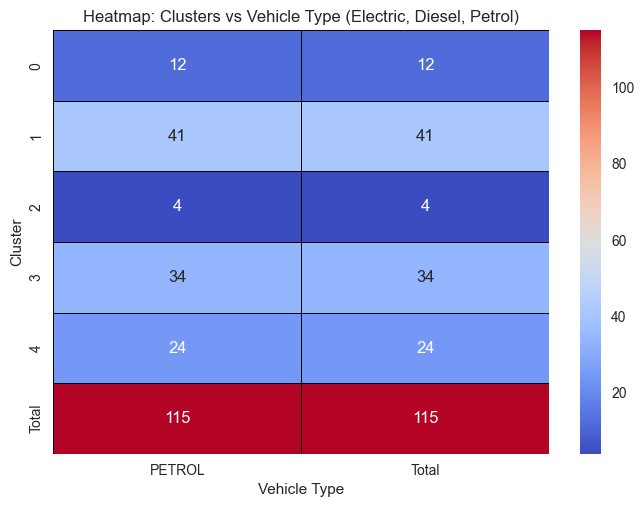

In [37]:
finalColumns = ['Month', 'DIESEL', 'Hybrid Combined', 'ELECTRIC(BOV)', 'PETROL', 'Year', 'Cluster', 'Cluster Number']

selectedFeatures = finaldf[finalColumns]
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'DIESEL', 'PETROL']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='coolwarm', cbar=True, linecolor='black', linewidths=0.5)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

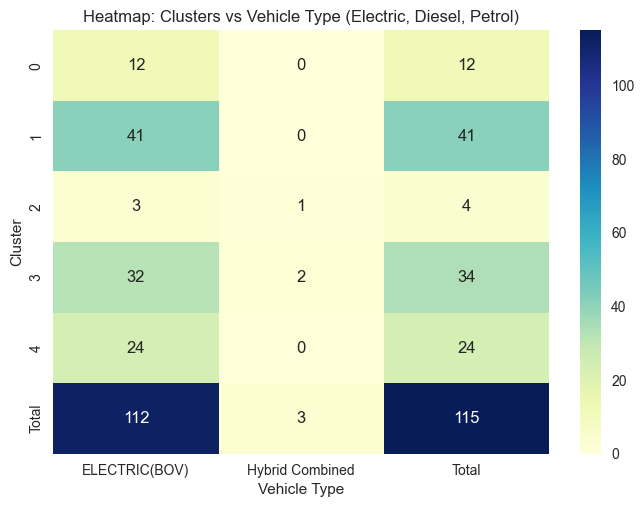

In [38]:
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'Hybrid Combined']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

## **7. Selecting the Target Segment(s)**

In [39]:
from sklearn.preprocessing import LabelEncoder
finaldf['ELECTRIC(BOV)']= LabelEncoder().fit_transform(finaldf['ELECTRIC(BOV)'])
electricBOV= finaldf.groupby('Cluster Number')['ELECTRIC(BOV)'].mean()
electricBOV= electricBOV.to_frame().reset_index()
electricBOV

,Cluster Number,ELECTRIC(BOV)
0,0,108.500000
1,1,22.731707
2,2,29.250000
3,3,63.617647
4,4,85.041667


In [40]:
# Calculating the mean
finaldf['Hybrid Combined']= LabelEncoder().fit_transform(finaldf['Hybrid Combined'])
hybridCombined= finaldf.groupby('Cluster Number')['Hybrid Combined'].mean()
hybridCombined= hybridCombined.to_frame().reset_index()
hybridCombined

,Cluster Number,Hybrid Combined
0,0,96.500000
1,1,11.609756
2,2,29.250000
3,3,52.647059
4,4,72.625000


In [41]:
segment = electricBOV.merge(hybridCombined, on = 'Cluster Number', how = 'left')
segment

,Cluster Number,ELECTRIC(BOV),Hybrid Combined
0,0,108.500000,96.500000
1,1,22.731707,11.609756
2,2,29.250000,29.250000
3,3,63.617647,52.647059
4,4,85.041667,72.625000


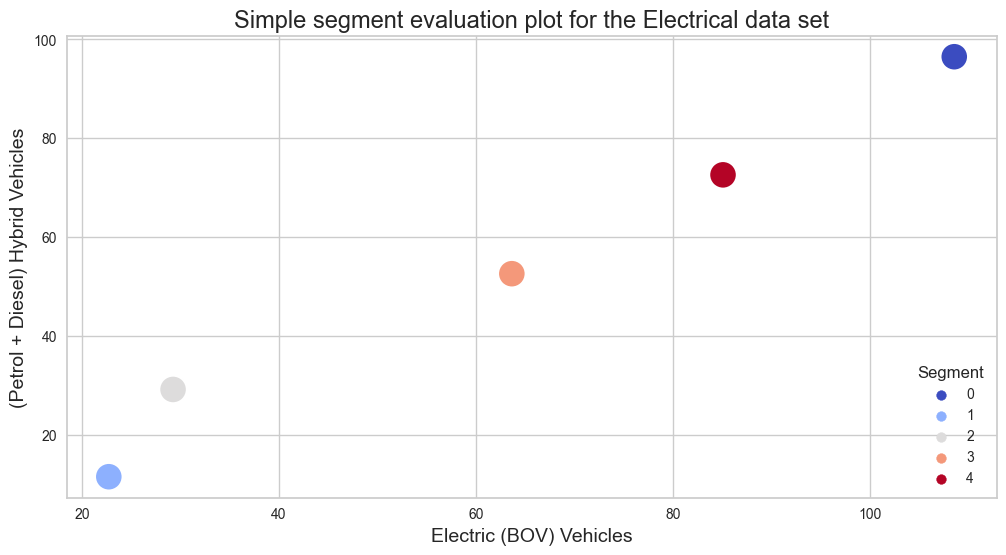

In [42]:
# Target segments

plt.figure(figsize = (12,6))
sns.scatterplot(x = "ELECTRIC(BOV)", y = "Hybrid Combined",data=segment,s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Electric (BOV) Vehicles", fontsize = 14) 
plt.ylabel("(Petrol + Diesel) Hybrid Vehicles", fontsize = 14) 
plt.legend(title='Segment', loc='lower right')
plt.show()

### **Decision Tree Classifier**

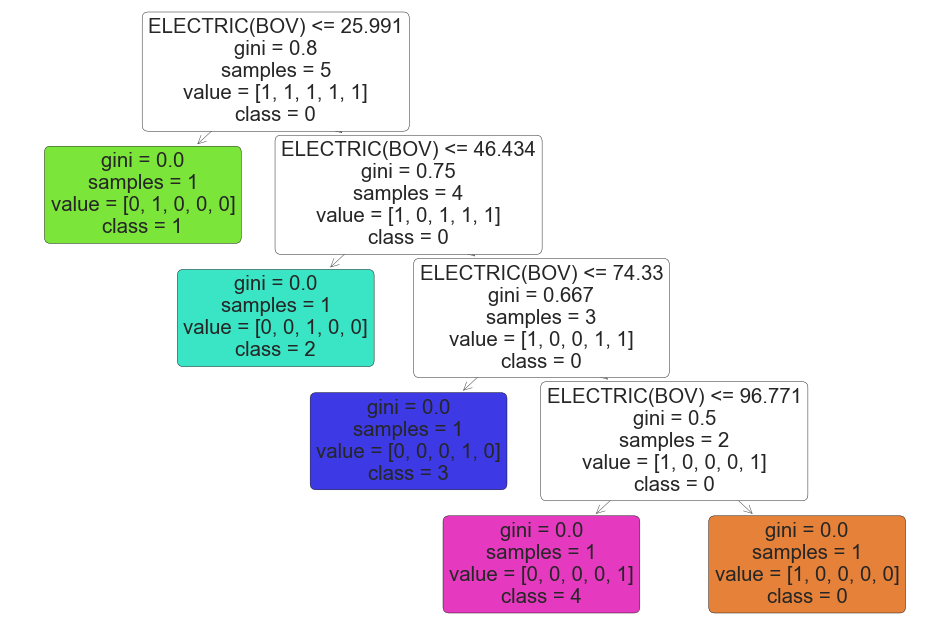

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


features = ['ELECTRIC(BOV)', 'Hybrid Combined']
target = 'Cluster Number'

X = segment[features]
y = segment[target]

# Creating a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.show()

- **Target Segment 0**: Prioritize marketing EVs' environmental benefits and lower running costs. Ensure easy access to charging infrastructure information. 
- **Segment 4**: Address price concerns and highlight the flexibility of having both hybrid and electric options. 
- **Segment 1**: Offer a diverse range of EV and hybrid options cater to various needs and budgets. 
Emphasize fuel efficiency and the evolving charging infrastructure landscape. 
- **Segments 2 and 3**: Focus on the practicality and reliability of hybrids while acknowledging the growing appeal 
of EVs. Address range anxiety concerns. 